Question 4
Q4 - reference


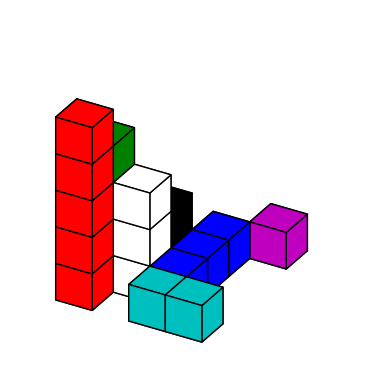

What would be the arrangement of cubes look like if seen from the right point of view?
a


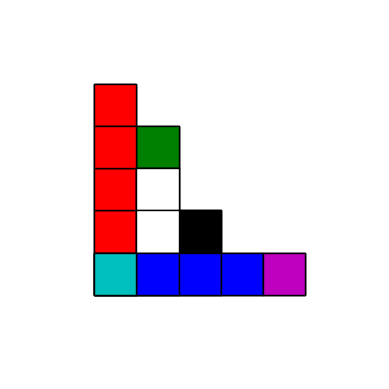

b


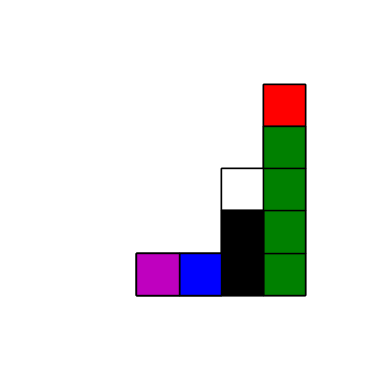

c


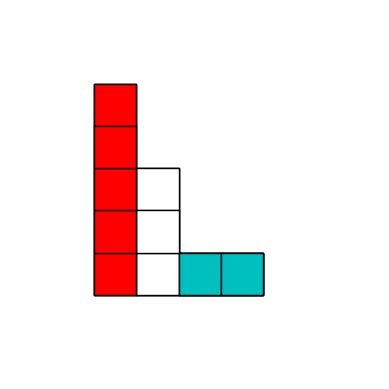

d


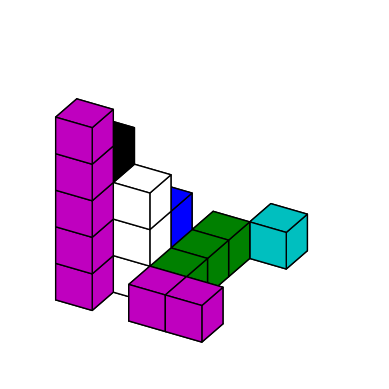

What would be the arrangement of cubes look like if seen from the right point of view? c
What would be the arrangement of cubes look like if seen from the right point of view? c
What would be the arrangement of cubes look like if seen from the right point of view? c
What would be the arrangement of cubes look like if seen from the right point of view? c
What would be the arrangement of cubes look like if seen from the right point of view? c
What would be the arrangement of cubes look like if seen from the right point of view? c
What would be the arrangement of cubes look like if seen from the right point of view? c
What would be the arrangement of cubes look like if seen from the right point of view? c
What would be the arrangement of cubes look like if seen from the right point of view? s
What would be the arrangement of cubes look like if seen from the right point of view? s
What would be the arrangement of cubes look like if seen from the right point of view? asdfa
What would be the

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

import time
import random
from bs4 import BeautifulSoup
import json

import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML,clear_output
%matplotlib widget

def draw_cubes(cubes, ticks=False, grid=False, view='', flip='', rot=0, ax3d=None):
    
    # create empty cube
    cubes_to_draw = np.zeros(cubes.shape)
    
    # set elements to 1 where colour is not empty
    cubes_to_draw[cubes!=''] = 1

    # make figure and 3d axes for plotting
    if ax3d is None:
        fig = plt.figure()
        ax = fig.add_subplot(projection='3d', proj_type='ortho', box_aspect=(4,4,4))
    else:
        ax = ax3d
        
    nx, ny, nz = cubes.shape

    ax.axes.set_xlim3d(0, nx) 
    ax.axes.set_ylim3d(0, ny) 
    ax.axes.set_zlim3d(0, nz) 

    # The cubes can be plotted using a 3D voxels plot
    ax.voxels(cubes_to_draw, facecolors=cubes, edgecolors='k', shade=False);

    # view argument allows users to set a 2D projection
    if view == 'xy': ax.view_init(90, -90, 0+rot)
    elif view == '-xy': ax.view_init(-90, 90, 0-rot)
    elif view == 'xz': ax.view_init(0, -90, 0+rot)
    elif view == '-xz': ax.view_init(0, 90, 0-rot)
    elif view == 'yz': ax.view_init(0, 0, 0+rot)
    elif view == '-yz': ax.view_init(0, 180, 0-rot)
    else:   ax.view_init(azim=ax.azim+rot)

    # flip argument allows user to show a mirror image
    # flip='x' reverses image in x direction etc.
    if 'x' in flip: ax.axes.set_xlim3d(nx, 0) 
    if 'y' in flip: ax.axes.set_ylim3d(ny, 0) 
    if 'z' in flip: ax.axes.set_zlim3d(nz, 0) 

    # style figure ticks and grid lines
    if ticks==False: 
        for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
            axis.set_ticklabels([])
            axis.line.set_linestyle('')
            axis._axinfo['tick']['inward_factor'] = 0.0
            axis._axinfo['tick']['outward_factor'] = 0.0
            
    if grid==False and ticks==False: ax.set_axis_off()
    
    if ax3d is not None:
        # return axes with result
        return
    else:
        # show image
        display(fig)

        # delete figure
        plt.close(fig)

    return

data_consent_info = """DATA CONSENT INFORMATION:
Please read:
we wish to record your response data
to an anonymised public data repository.
Your data will be used for educational teaching purposes
practising data analysis and visualisation.
Please type yes in the box below if you consent to the upload."""
print(data_consent_info)
result = input("> ")
if result == "yes":
    print("Thanks for your participation.")
    print("Please contact philip.lewis@ucl.ac.uk")
    print("If you have any questions or concerns")
    print("regarding the stored results.")
else:
# end code execution by raising an exception
    raise(Exception("User did not consent to continue test."))

clear_output()

id_instructions = """

Enter your anonymised ID

To generate an anonymous 4-letter unique user identifier please enter:

- two letters based on the initials (first and last name) of a childhood friend

- two letters based on the initials (first and last name) of a favourite actor / actress

e.g. if your friend was called Charlie Brown and film star was Tom Cruise

then your unique identifer would be CBTC

"""

print(id_instructions)

user_id = input("> ")

print("User entered id:", user_id)

clear_output()

# To send to google forms
def send_to_google_form(data_dict, form_url):
    ''' Helper function to upload information to a corresponding Google Form 
        You are not expected to follow the code within this function!
    '''
    form_id = form_url[34:90]
    view_form_url = f'https://docs.google.com/forms/d/e/{form_id}/viewform'
    post_form_url = f'https://docs.google.com/forms/d/e/{form_id}/formResponse'
    page = requests.get(view_form_url)
    content = BeautifulSoup(page.content, "html.parser").find('script', type='text/javascript')

    if content is None:
        print("Script tag not found. Data not uploaded.")
        return False

    content_text = content.text[27:-1] if content.text else None

    if not content_text:
        print("Content text not found. Data not uploaded.")
        return False

    try:
        result = json.loads(content_text)[1][1]
        print("Content of the script tag:")
        print(result)
        form_dict = {}
    
        loaded_all = True
        for item in result:
            # Remove non-alphanumeric characters from the item name
            item_name_cleaned = ''.join(char.lower() for char in item[1] if char.isalnum())
            
            # Check if the cleaned item name matches any key in the data dictionary
            matching_keys = [key for key in data_dict.keys() if item_name_cleaned in ''.join(char.lower() for char in key if char.isalnum())]
            
            if not matching_keys:
                print(f"Form item {item[1]} not found. Data not uploaded.")
                loaded_all = False
                return False
            
            # Use the first matching key as the data dictionary key
            form_dict[f'entry.{item[4][0][0]}'] = data_dict[matching_keys[0]]
        
        post_result = requests.post(post_form_url, data=form_dict)
        return post_result.ok
    
    except (json.JSONDecodeError, IndexError) as e:
        print(f"Error decoding JSON or accessing result: {e}")
        return False
                     
#Pre-test information

print("Please enter your age:")
ans1 = input("> ")

print("Please enter your gender(F/M):")
ans2 = input("> ")

clear_output()

results = []

form_url = "https://docs.google.com/forms/d/e/1FAIpQLSdeb8DktCPfgS0DAxdnYhLtmsMYlT_021BDmkWxidVYeLecMQ/viewform?usp=sf_link"


#Opening Instructions
print("Welcome to the Spatial Mapping Task")
time.sleep(1)
print("When asked a question on the, type in an answer a-d")
time.sleep(1)
clear_output()

print ("Question 1 Reference Image:")
#Arrangement 1 3D
arrangement1 = np.full((5,5,5),'')
arrangement1[0,0,0:3] = 'r' 
arrangement1[1,0,0:2] = 'w'
arrangement1[0,1,0:2] = 'k'
arrangement1[1,1,0] = 'b'
arrangement1[2,3,0] = 'b'
arrangement1[3,3,0:1] = 'k'
arrangement1[2,4,0:3] = 'w'
arrangement1[3,4,0:2] = 'r'
draw_cubes(arrangement1)
time.sleep(1)

print ("What would be the view, if the top arrangement of cubes was seen from the top?")
time.sleep(3)
start_time1 = time.time()
#Arrangement 1 2D answers
cubes1 = np.full((5,5,5),'')
cubes1[0,0,0:3] = 'r' 
cubes1[1,0,0:2] = 'w'
cubes1[0,1,0:2] = 'k'
cubes1[1,1,0] = 'b'
cubes1[2,3,0] = 'b'
cubes1[3,3,0:1] = 'k'
cubes1[2,4,0:3] = 'w'
cubes1[3,4,0:2] = 'r'
#Q1 - correct answer - top view - a
print("a")
draw_cubes(cubes1, view='xy')
#Q1 - incorrect answer - b
print("b")
cubes1_b = np.full((5,5,5),'')
cubes1_b[0,1,0:3] = 'r' 
cubes1_b[1,0,0:1] = 'w'
cubes1_b[0,0,0:2] = 'b'
cubes1_b[1,1,0] = 'k'
cubes1_b[2,3,0] = 'b'
cubes1_b[3,3,0:1] = 'k'
cubes1_b[2,4,0:3] = 'r'
cubes1_b[3,4,0:2] = 'w'
draw_cubes(cubes1_b, view='xy')
#Q1 - incorrect answer - c
print("c")
cubes1_c = np.full((5,5,5),'')
cubes1_c[0,3,0:3] = 'r' 
cubes1_c[1,3,0:1] = 'w'
cubes1_c[0,4,0:2] = 'b'
cubes1_c[1,4,0] = 'k'
cubes1_c[2,0,0] = 'b'
cubes1_c[3,0,0:1] = 'k'
cubes1_c[2,1,0:3] = 'r'
cubes1_c[3,1,0:2] = 'w'
draw_cubes(cubes1_c, view='xy')
#Q1 - incorrect answer - d
print("d")
cubes1_d = np.full((5,5,5),'')
cubes1_d[0,3,0:3] = 'w' 
cubes1_d[1,3,0:1] = 'r'
cubes1_d[0,4,0:2] = 'k'
cubes1_d[1,4,0] = 'b'
cubes1_d[2,0,0] = 'r'
cubes1_d[3,0,0:1] = 'b'
cubes1_d[2,1,0:3] = 'k'
cubes1_d[3,1,0:2] = 'w'
draw_cubes(cubes1_d, view='xy')

score = 0
ans3 = ""
while ans3 != 'a':
    ans3 = input("Which of the images would be the view seen of the arrangment from the top?")
if ans3:
    score += 1
    print("\n")
else:
    score += -1
end_time1 = time.time()
plt.close("all")
time_taken1 = end_time1 - start_time1
print("Well done!")
time.sleep(1)
print(f"You took {time_taken1:.2f} seconds")
time.sleep(3)

clear_output()

#QUESTION 2
print("Question 2")
time.sleep(1)
#Arrangement 2 
print("Q2 - Reference")
arrangement2 = np.full((5,5,5),'')
arrangement2[0:3,1,0:3] = 'm' 
arrangement2[0:2,0,0:1] = 'w'
arrangement2[0,4,0:5] = 'g'
arrangement2[4,0,0] = 'r'
arrangement2[4,2,0:2] = 'b'
arrangement2[2:4,0,0:2] = 'c'
draw_cubes(arrangement2)
print("What would the arrangement of cubes look like if it was flipped upside down?")
time.sleep(1)
start_time2 = time.time()
#2d Answers - arrangement 2
cubes2 = np.full((5,5,5),'')
cubes2[0:3,1,0:3] = 'm' 
cubes2[0:2,0,0:1] = 'w'
cubes2[0,4,0:5] = 'g'
cubes2[4,0,0] = 'r'
cubes2[4,2,0:2] = 'b'
cubes2[2:4,0,0:2] = 'c'
print("a")
#Q2 - incorrect answer - a
cubes2_a = np.full((5,5,5),'')
cubes2_a[0:3,1,0:3] = 'b' 
cubes2_a[0:2,0,0:1] = 'm'
cubes2_a[0,4,0:5] = 'g'
cubes2_a[4,0,0] = 'c'
cubes2_a[4,2,0:2] = 'b'
cubes2_a[2:4,0,0:2] = 'w'
draw_cubes(cubes2_a)
print("b")
#Q2 - incorrect answer - b
cubes2_b = np.full((5,5,5),'')
cubes2_b[0:3,1,0:3] = 'm' 
cubes2_b[0:2,0,0:2] = 'w'
cubes2_b[2,4,0:5] = 'g'
cubes2_b[3,0,0] = 'r'
cubes2_b[4,2,0:2] = 'b'
cubes2_b[2:3,0,0:2] = 'c'
draw_cubes(cubes2_b)
print("c")
#Q2 - correct answer - c
draw_cubes(arrangement2, flip='z')
print("d")
#Q2 - incorrect answer - d
cubes2_d = np.full((5,5,5),'')
cubes2_d[0:2,1,0:3] = 'm' 
cubes2_d[1:2,0,0:1] = 'w'
cubes2_d[0,2,0:4] = 'g'
cubes2_d[3,0,0] = 'r'
cubes2_d[4,2,0:1] = 'b'
cubes2_d[2:4,0,0:2] = 'c'
draw_cubes(cubes2_d)

ans4 = ""
while ans4 != 'c':
    ans4 = input("What would the arrangement of cubes look like if it was flipped upside down?: ")
if ans4:
    score += 1
    print("\n")
else:
    score += -1
end_time2 = time.time()
plt.close("all")
time_taken2 = end_time2 - start_time2
print("Well done!")
time.sleep(1)
print(f"You took {time_taken2:.2f} seconds")
time.sleep(3)

clear_output()

#QUESTION 3
print("Question 3")
time.sleep(1)
#Arrangement 3 
print("Q3 - Reference")
arrangement3 = np.full((5,5,5),'')
arrangement3[0:3,0,0] = 'r' 
arrangement3[3,1:3,0] = 'b' 
arrangement3[1:3,1:3,0:2] = 'k' 
arrangement3[3,0,0] = 'y'
arrangement3[1,2,2] = 'm'
arrangement3[0,1,0:4] = 'g'
draw_cubes(arrangement3)
print("What would the arrangement of cubes look like if it was seen from the left point of view?")
time.sleep(1)
start_time3 = time.time()

# correct answer - a
draw_cubes(arrangement3, view='xz')
# incorrect - b
cubes3_b = np.full((5,5,5),'')
cubes3_b[0:3,0,0] = 'r' 
cubes3_b[0,1:3,3] = 'b' 
cubes3_b[0:2,1:3,1:3] = 'k' 
cubes3_b[0,0,3] = 'y'
cubes3_b[2,2,1] = 'm'
cubes3_b[0:4,1,0] = 'g'
draw_cubes(cubes3_b,view='xz')
# incorrect - c
cubes3_c = np.full((5,5,5),'')
cubes3_c[3:5,0,0] = 'r' 
cubes3_c[1:3,2:3,0:2] = 'b' 
cubes3_c[4:5,1:3,0:2] = 'k' 
cubes3_c[0:3,0,0] = 'y'
cubes3_c[3,2,2] = 'm'
cubes3_c[4,1,0:4] = 'g'
draw_cubes(cubes3_c,view='xz')
# incorrect - d
cubes3_d = np.full((5,5,5),'')
cubes3_d[0:3,0,0] = 'r' 
cubes3_d[3,1:3,0] = 'g' 
cubes3_d[1:3,1:3,0:2] = 'k' 
cubes3_d[3,0,0] = 'm'
cubes3_d[1,2,2] = 'y'
cubes3_d[0,1,0:4] = 'b'
draw_cubes(cubes3_d, view='xz')
ans5 = ""
while ans5 != 'a':
    ans5 = input("What would the arrangement of cubes look like if it was seen from the left point of view?")
if ans5:
    score += 1
    print("\n")
else:
    score += -1
end_time3 = time.time()
plt.close("all")
time_taken3 = end_time3 - start_time3
print("Well done!")
time.sleep(1)
print(f"You took {time_taken3:.2f} seconds")
time.sleep(3)

clear_output()

#Question 4
print("Question 4")
time.sleep(1)
print("Q4 - reference")
#Arrangement 4
arrangement4 = np.full((5,5,5),'')
arrangement4[0,0,0:5] = 'r' 
arrangement4[0,1,0:4] = 'g'
arrangement4[1,1:2,0:3] = 'w' 
arrangement4[1:2,2,0:2] = 'k'
arrangement4[3,4,0]= 'm'
arrangement4[2:4,0,0] = 'c'
arrangement4[2:3,1:4,0:1] = 'b'
draw_cubes(arrangement4)
print("What would be the arrangement of cubes look like if seen from the right point of view?")
time.sleep(1)
start_time4 = time.time()
# incorrect answer - a
print("a")
cubes4_a = np.full((5,5,5),'')
cubes4_a[0,0,0:5] = 'r' 
cubes4_a[0,1,0:4] = 'g'
cubes4_a[1,1:2,0:3] = 'w' 
cubes4_a[1:2,2,0:2] = 'k'
cubes4_a[3,4,0]= 'm'
cubes4_a[2:4,0,0] = 'c'
cubes4_a[2:3,1:4,0:1] = 'b'
draw_cubes(cubes4_a, view='yz')

#correct - b
print("b")
draw_cubes(arrangement4, view='-xz')

#incorrect - c
print("c")
cubes4_c = np.full((5,5,5),'')
cubes4_c[0,0,0:5] = 'r' 
cubes4_c[0,1,0:4] = 'g'
cubes4_c[1,1:2,0:3] = 'w' 
cubes4_c[1:2,2,0:2] = 'k'
cubes4_c[3,4,0]= 'm'
cubes4_c[2:4,0,0] = 'c'
cubes4_c[2:3,1:4,0:1] = 'b'
draw_cubes(cubes4_c, view='xz')

#incorrect - d
print("d")
cubes4_d = np.full((5,5,5),'')
cubes4_d[0,0,0:5] = 'm' 
cubes4_d[0,1,0:4] = 'k'
cubes4_d[1,1:2,0:3] = 'w' 
cubes4_d[1:2,2,0:2] = 'b'
cubes4_d[3,4,0]= 'c'
cubes4_d[2:4,0,0] = 'm'
cubes4_d[2:3,1:4,0:1] = 'g'
draw_cubes(cubes4_d)
ans6 = ""
while ans6 != 'b':
    ans6 = input("What would be the arrangement of cubes look like if seen from the right point of view?")
if ans6:
    score += 1
    print("\n")
else:
    score += -1
end_time4 = time.time()
plt.close("all")
time_taken4 = end_time4 - start_time4
print("Well done!")
time.sleep(1)
print(f"You took {time_taken4:.2f} seconds")
time.sleep(3)

clear_output()

#Question 5
print("Question 5")
time.sleep(1)
print("Q5 - reference")
#Arrangement 5
arrangement5 = np.full((5,5,5),'')
arrangement5[0:5,4,0] = 'm' 
arrangement5[3,3:4,0:1] = 'b' 
arrangement5[0:2,0:2,0] = 'w' 
arrangement5[3,0:2,0:1] = 'y'
arrangement5[0,2:4,0]= 'k'
arrangement5[0,3:5,1:3] = 'r'
arrangement5[4:5,0:3,0:3] = 'g'
arrangement5[0,0:3,1:2] = 'b'
draw_cubes(arrangement5)
print("What would be the arrangement of cubes look like if seen from the bottom)?")
time.sleep(1)
start_time5 = time.time()
#incorrect a
print("a")
draw_cubes(arrangement5, view='xy')
#incorrect b
print("b")
draw_cubes(arrangement5, view='xz')
#incorrect c
print("c")
draw_cubes(arrangement5, view='-yz')
#correct d
print("d")
draw_cubes(arrangement5, view='-xy')
ans7 = ""
while ans7 != 'd':
    ans7 = input("What would the arrangement of cubes look like if seen from the bottom?")
if ans7:
    score += 1
    print("\n")
else:
    score += -1
end_time5 = time.time()
time_taken5 = end_time5 - start_time5
print("Well done!")
time.sleep(1)
print(f"You took {time_taken5:.2f} seconds")
time.sleep(3)

clear_output()

#Question 6
print("Question 6")
time.sleep(1)
print("Q6 - reference")
#Arrangement 6
arrangement6 = np.full((5,5,5),'')
arrangement6[0:3,0,0] = 'm' 
arrangement6[3,1:3,0] = 'w' 
arrangement6[3,0,0] = 'y'
arrangement6[1:3,1:3,0] = 'y'
arrangement6[1,2,2] = 'm'
arrangement6[0,1,0:4] = 'g'
arrangement6[1,2,3]='k'
arrangement6[1,4,0:5] = 'g'
arrangement6[1,3,0:3] = 'm'
arrangement6[0,0,1:3] = 'w'
draw_cubes(arrangement6)
print("What would be the right side arrangement of cubes if looking from behind the 3d reference?")
time.sleep(1)
start_time6 = time.time()
#incorrect a
draw_cubes(arrangement6, view='yz')
#incorrect b
draw_cubes(arrangement6, view='xz')
#correct c
draw_cubes(arrangement6, view='-yz')
#incorrect d
draw_cubes(arrangement6, view='-xy')
ans8 = ""
while ans8 != 'd':
    ans8 = input("What would be the right side arrangement of cubes if looking from behind the 3d reference?")
if ans8:
    score += 1
    print("\n")
else:
    score += -1
end_time6 = time.time()
time_taken6 = end_time6 - start_time6
print("Well done!")
time.sleep(1)
print(f"You took {time_taken6:.2f} seconds")
time.sleep(3)

clear_output()

#Question 7
print("Question 7")
time.sleep(1)
print("Q7 - reference")
#Arrangement 7
print("Q7 - Reference")
arrangement7 = np.full((5,5,5),'')
arrangement7[0:3,0,0] = 'k' 
arrangement7[1:2,1:3,3:5] = 'g'
arrangement7[3,1:3,0] = 'b' 
arrangement7[0,1,0:4] = 'g'
arrangement7[1,2,2] = 'b'
arrangement7[1:2,1:2,0:3] = 'w'
arrangement7[2:3,3:4,0:2]='k'
draw_cubes(arrangement7)
print("What would be the arrangement of cubes look like if seen from the top?")
time.sleep(1)
start_time7 = time.time()
#correct a
print("a")
draw_cubes(arrangement7, view='xy')
#incorrect b
print("b")
draw_cubes(arrangement7, view='-xy')
#incorrect c
print("c")
draw_cubes(arrangement7, view='yz')
#incorrect d
print("d")
draw_cubes(arrangement7, view='-yz')
ans9 = ""
while ans9 != 'a':
    ans9 = input("What would the arrangement of cubes look like if seen from the top?")
if ans9:
    score += 1
    print("\n")
else:
    score += -1
end_time7 = time.time()
time_taken7 = end_time7 - start_time7
print("Well done!")
time.sleep(1)
print(f"You took {time_taken7:.2f} seconds")
time.sleep(3)

clear_output()

#Question 8
print("Question 8")
time.sleep(1)
print("Q8 - reference")
#Arrangement 8
print("reference")
arrangement8 = np.full((5,5,5),'')
arrangement8[0:3,0,0] = 'm' 
arrangement8[3,1:4,0] = 'm' 
arrangement8[1:3,1,0:2] = 'y' 
arrangement8[1,2,2] = 'm'
arrangement8 [2,2:5,1:3] = 'r'
draw_cubes(arrangement8)
print("What would be the arrangement of cubes look like if seen from the rightwards direction?")
time.sleep(1)
start_time8 = time.time()
#incorrect a
print("a")
draw_cubes(arrangement8, view='xz')
#correct b
print("b")
draw_cubes(arrangement8, view='-xz')
#incorrect c
print("c")
draw_cubes(arrangement8, view='yz')
#incorrect d
print("d")
draw_cubes(arrangement8, view='xy')
ans10 = ""
while ans10 != 'b':
    ans10 = input("What would be the arrangement of cubes look like if seen from the rightwards direction?")
if ans10:
    score += 1
    print("\n")
else:
    score += -1
end_time8 = time.time()
time_taken8 = end_time8 - start_time8
print("Well done!")
time.sleep(1)
print(f"You took {time_taken8:.2f} seconds")
time.sleep(3)

clear_output()

#Question 9
print("Question 9")
time.sleep(1)
print("Q9 - reference")
#arrangement 9
print("reference")
arrangement9 = np.full((5,5,5),'')
arrangement9[0:4,1,1:2] = 'b' 
arrangement9[3,1:4,0:1] = 'w' 
arrangement9[1:3,1,0:2] = 'r' 
arrangement9[0,3,2] = 'm'
arrangement9 [4,2:4,1:5] = 'r'
draw_cubes(arrangement9)
print("What would be the arrangement of cubes look like if seen from the top?")
time.sleep(1)
start_time9 = time.time()

#incorrect a
print("a")
draw_cubes(arrangement9, view='xz')
#incorrect b
print("b")
draw_cubes(arrangement9, view='-xz')
#incorrect c
print("c")
draw_cubes(arrangement9, view='yz')
#correct d
print("d")
draw_cubes(arrangement9, view='xy')

ans11 = ""
while ans11 != 'd':
    ans11 = input("What would the arrangement of cubes look like if seen from the top?")
if ans11:
    score += 1
    print("\n")
else:
    score += -1
end_time9 = time.time()
time_taken9 = end_time9 - start_time9
print("Well done!")
time.sleep(1)
print(f"You took {time_taken9:.2f} seconds")
time.sleep(3)

clear_output()

#Question 10
print("Question 10")
time.sleep(1)
print("Q10 - reference")
#arrangement 10
print("reference")
arrangement10 = np.full((5,5,5),'')
arrangement10[0:4,1,1:2] = 'k' 
arrangement10[3,1:4,0:1] = 'r' 
arrangement10[1:3,1,0:2] = 'r' 
arrangement10[0,3,2] = 'w'
arrangement10 [4,2:4,1:3] = 'k'
arrangement10[0:2,3:4,2] = 'r'
arrangement10[0,2:4,3:4] = 'w'
arrangement10[2,4,4:5] = 'w'
draw_cubes(arrangement10)
print("What would be the leftside arrangement of cubes look like if the 3d reference was seen from behind?")
time.sleep(1)
start_time10 = time.time()

#correct a
print("a")
draw_cubes(arrangement10, view='xz')
#incorrect b
print("b")
draw_cubes(arrangement10, view='-xz')
#incorrect c
print("c")
draw_cubes(arrangement10, view='yz')
#incorrect d
print("d")
draw_cubes(arrangement10, view='xy')

ans12 = ""
while ans12 != 'a':
    ans12 = input("What would be the leftside arrangement of cubes look like if the 3d reference was seen from behind?")
if ans12:
    score += 1
    print("\n")
else:
    score += -1
end_time10 = time.time()
time_taken10 = end_time10 - start_time10
print("Well done!")
time.sleep(1)
print(f"You took {time_taken10:.2f} seconds")
time.sleep(3)

clear_output()

print(f"your final score is", score, "Congratulations!")
time.sleep(1)

# Results collected - timings
Total_Time = time_taken1+time_taken2+time_taken3+time_taken4+time_taken5+time_taken6+time_taken7+time_taken8+time_taken9+time_taken10
Avg_Time = Total_Time / 10
print()
print("For the whole test the time you took is: "+str(Total_Time))
print("Your average time taken is: "+str(Avg_Time))
print("Thank you! Hope you enjoyed")
print()

#for collecting data to google form
import requests

data_dict = {
    'User ID': user_id,
    'Age': ans1,
    'Gender': ans2,
    'Question 1 Answer': ans3,
    'Question 1 Time': time_taken1,
    'Question 2 Answer': ans4,
    'Question 2 Time': time_taken2,
    'Question 3 Answer': ans5,
    'Question 3 Time': time_taken3,
    'Question 4 Answer': ans6,
    'Question 4 Time': time_taken4,
    'Question 5 Answer': ans7,
    'Question 5 Time': time_taken5,
    'Question 6 Answer': ans8,
    'Question 6 Time': time_taken6,
    'Question 7 Answer': ans9,
    'Question 7 Time': time_taken7,
    'Question 8 Answer': ans10,
    'Question 8 Time': time_taken8,
    'Question 9 Answer': ans11,
    'Question 9 Time': time_taken9,
    'Question 10 Answer': ans12,
    'Question 10 Time': time_taken10,
    'Total Time Taken': Total_Time,
    'Avg time per Q': Avg_Time,
    'Score': score}

upload_success = send_to_google_form(data_dict, form_url)

# Print the result
if upload_success:
    print("Data uploaded successfully!")
else:
    print("Data upload failed.")
    


